In [1]:
from semb.datasets import load as load_dataset
from semb.datasets import get_dataset_ids
for did in get_dataset_ids():
    print(did)
    load_dataset(did)

BlogCatalog
ICEWS
Facebook
DD6
PPI
airports


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Get airports datasets
DataProvider = load_dataset("airports")
Datasets = DataProvider().get_datasets()
dataset_graph = DataProvider().load_dataset(Datasets[0])

In [4]:
Datasets

[DatasetInfo(name='brazil', description='Brazil airport sample data', src_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sample-data/Airports/airport_Brazil/brazil-airports.edgelist'),
 DatasetInfo(name='european', description='European airport sample data', src_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sample-data/Airports/airport_European/europe-airports.edgelist'),
 DatasetInfo(name='US', description='European airport sample data', src_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sample-data/Airports/airport_US/usa-airports.edgelist')]

In [5]:
from semb.methods import load as load_method
from semb.methods import get_method_ids
for mid in get_method_ids():
    print(mid)
    load_method(mid)

graphwave
degree2
drne


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

node2vec
degree
role2vec
line
degree1
struc2vec
xnetmf
multilens
segk
riwalk


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
# Define a hyper-class to load the embedding method
EmbMethodClass = load_method("struc2vec")

# Call the embedding method with the graph for initialization
struc2vec = EmbMethodClass(dataset_graph, 
                           num_walks=10, 
                           walk_length=80, 
                           window_size=10, 
                           dim=128, 
                           opt1=True, opt2=True, opt3=True, until_layer=2)
struc2vec.train()

# Get the embedding result with the get_embeddings() method,
# The return type is a dictionary with key as node_id and value as the embedding
dict_struc2vec_emb = struc2vec.get_embeddings()

rm /Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/methods/struc2vec/pickles/weights_distances-layer-*.pickle


In [7]:
EmbMethodClassXnetmf = load_method("xnetmf")

In [8]:
EmbMethodClassXnetmf.__PARAMS__

{'dim': 128, 'max_layer': 2, 'discount': 0.1, 'gamma': 1}

In [9]:
xnetmf = EmbMethodClassXnetmf(dataset_graph,
                              dim = 128,
                              max_layer = 2,
                              discount = 0.1,
                              gamma = 1
                       )

In [10]:
xnetmf.train()
dict_xnetmf_emb = xnetmf.get_embeddings()

max degree:  80
got k hop neighbors in time:  0.038465023040771484
got degree sequences in time:  0.012195825576782227
computed representation in time:  0.008967161178588867


In [11]:
from semb.evaluations.classification import *
from semb.evaluations.clustering import *
from semb.evaluations.utils import *

In [12]:
# Read the label file with the get_label(fn) function
dict_labels = get_label("./sample-data/labels/airport_Brazil_label.txt")

Read in 131 node labels.
>>> Label 0 appears 32 times
>>> Label 1 appears 32 times
>>> Label 3 appears 35 times
>>> Label 2 appears 32 times


In [13]:
result_struc2vec = perform_classification(dict_struc2vec_emb, dict_labels)

In [14]:
result_xnetmf = perform_classification(dict_xnetmf_emb, dict_labels)

In [15]:
result_struc2vec

{'overall': {'accuracy': {'mean': 0.7937, 'std': 0.0795},
  'f1_macro': {'mean': 0.7873, 'std': 0.0806},
  'f1_micro': {'mean': 0.7937, 'std': 0.0795},
  'auc_micro': {'mean': 0.9209, 'std': 0.0347},
  'auc_macro': {'mean': 0.9244, 'std': 0.0333}},
 'detailed': {0: {'accuracy': 0.8148,
   'f1_macro': 0.805,
   'f1_micro': 0.8148,
   'auc_micro': 0.925,
   'auc_macro': 0.9272},
  1: {'accuracy': 0.6538,
   'f1_macro': 0.6542,
   'f1_micro': 0.6538,
   'auc_micro': 0.8575,
   'auc_macro': 0.8674},
  2: {'accuracy': 0.7692,
   'f1_macro': 0.7448,
   'f1_micro': 0.7692,
   'auc_micro': 0.9354,
   'auc_macro': 0.9234},
  3: {'accuracy': 0.8846,
   'f1_macro': 0.8769,
   'f1_micro': 0.8846,
   'auc_micro': 0.963,
   'auc_macro': 0.9717},
  4: {'accuracy': 0.8462,
   'f1_macro': 0.8554,
   'f1_micro': 0.8462,
   'auc_micro': 0.9236,
   'auc_macro': 0.9323}}}

In [16]:
result_xnetmf

{'overall': {'accuracy': {'mean': 0.7103, 'std': 0.0813},
  'f1_macro': {'mean': 0.692, 'std': 0.0821},
  'f1_micro': {'mean': 0.7103, 'std': 0.0813},
  'auc_micro': {'mean': 0.9013, 'std': 0.0462},
  'auc_macro': {'mean': 0.9097, 'std': 0.0458}},
 'detailed': {0: {'accuracy': 0.6667,
   'f1_macro': 0.6293,
   'f1_micro': 0.6667,
   'auc_micro': 0.898,
   'auc_macro': 0.896},
  1: {'accuracy': 0.5769,
   'f1_macro': 0.5673,
   'f1_micro': 0.5769,
   'auc_micro': 0.8215,
   'auc_macro': 0.8336},
  2: {'accuracy': 0.8077,
   'f1_macro': 0.7939,
   'f1_micro': 0.8077,
   'auc_micro': 0.9596,
   'auc_macro': 0.9641},
  3: {'accuracy': 0.7692,
   'f1_macro': 0.7446,
   'f1_micro': 0.7692,
   'auc_micro': 0.931,
   'auc_macro': 0.9491},
  4: {'accuracy': 0.7308,
   'f1_macro': 0.725,
   'f1_micro': 0.7308,
   'auc_micro': 0.8964,
   'auc_macro': 0.9056}}}

In [17]:
clu_struc2vec = perform_clustering(dict_struc2vec_emb, dict_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [18]:
clu_xnetmf = perform_clustering(dict_xnetmf_emb, dict_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [32]:
concatenate_result_pd([("xnetmf", result_xnetmf), 
                       ("struc2vec", result_struc2vec),
                       ("struc2vec", result_struc2vec),
                       ("struc2vec", result_struc2vec),
                       ("struc2vec", result_struc2vec),
                       ("struc2vec", result_struc2vec)])

,methods,accuracy_mean,accuracy_std,f1_macro_mean,f1_macro_std,f1_micro_mean,f1_micro_std,auc_micro_mean,auc_micro_std,auc_macro_mean,auc_macro_std
0,xnetmf,0.7103,0.0813,0.6920,0.0821,0.7103,0.0813,0.9013,0.0462,0.9097,0.0458
1,struc2vec,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
2,struc2vec,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
3,struc2vec,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
4,struc2vec,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
5,struc2vec,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333


In [33]:
concatenate_result_pd([("xnetmf", clu_xnetmf), 
                       ("struc2vec", clu_struc2vec)])

,methods,purity,nmi
0,xnetmf,0.450382,0.247507
1,struc2vec,0.679389,0.485475


In [43]:
rtn_pd = concatenate_result_pd([("xnetmf", result_xnetmf), 
                       ("struc2vec1", result_struc2vec),
                       ("struc2vec2", result_struc2vec),
                       ("struc2vec3", result_struc2vec),
                       ("struc2vec5", result_struc2vec),
                       ("struc2vec6", result_struc2vec)])

In [44]:
def visualize_classification(list_results):

SyntaxError: unexpected EOF while parsing (<ipython-input-44-4761c9c7cfa5>, line 1)

In [45]:
rtn_pd

,methods,accuracy_mean,accuracy_std,f1_macro_mean,f1_macro_std,f1_micro_mean,f1_micro_std,auc_micro_mean,auc_micro_std,auc_macro_mean,auc_macro_std
0,xnetmf,0.7103,0.0813,0.6920,0.0821,0.7103,0.0813,0.9013,0.0462,0.9097,0.0458
1,struc2vec1,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
2,struc2vec2,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
3,struc2vec3,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
4,struc2vec5,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333
5,struc2vec6,0.7937,0.0795,0.7873,0.0806,0.7937,0.0795,0.9209,0.0347,0.9244,0.0333


(0, 1)

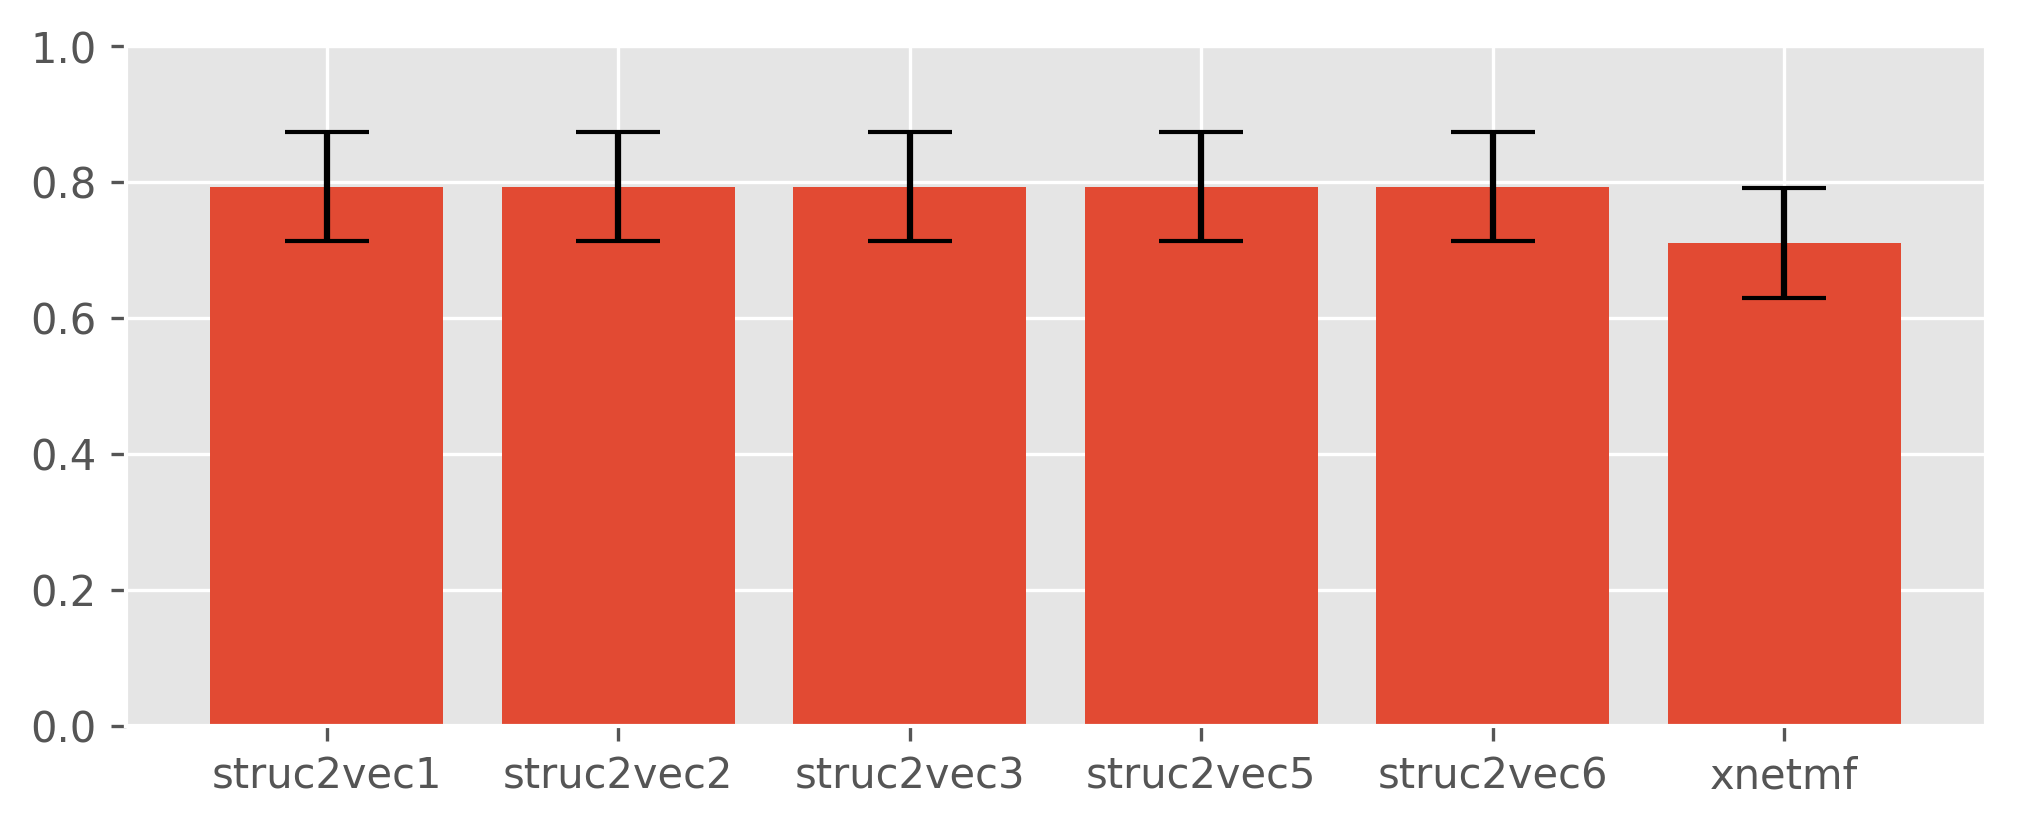

In [54]:
plt.close()
plt.figure(figsize=(8,3), dpi=300)
plt.style.use('ggplot')
plt.bar(rtn_pd['methods'], rtn_pd["accuracy_mean"], yerr=rtn_pd["accuracy_std"], capsize=10)
plt.ylim([0, 1])

In [ ]:
fig, ax = plt.subplots()
ax.bar()